In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/13_sya_2_1.wav
/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/13_sya_4_1.wav
/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/13_sya_3_4.wav
/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/13_sya_1_3.wav
/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/12_sa_3_4.wav
/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/13_sya_5_2.wav
/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/13_sya_5_1.wav
/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/13_sya_4_3.wav
/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/13_sya_1_4.wav
/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/13_sya_2_4.wav
/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/13_sya_6_4.wav
/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/13_sya_3_1.wav
/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/13_sya_1_2.wav
/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/13_sya_6_1.wav
/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/13_sya_1_1.wav
/kaggle/input/hijaiyah-full/Hijaiyah-full/Sya/13_sya_2_2.wav
/kaggle/input/hijaiyah-fu

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Packages

In [4]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from pydub import AudioSegment
from scipy.signal import spectrogram
import tensorflow_io as tfio
import tensorflow_hub as hub

# Load and Preprocess Data

In [5]:
def process_audio_to_spectrogram(file_path, target_length=12000):
    
        if file_path.endswith(".wav"):
                        wav, sr = librosa.load(file_path, sr = None)
                        wav = tf.convert_to_tensor(wav, dtype=tf.float32)
                        sr = tf.convert_to_tensor(sr, dtype=tf.int32)
                        sample_rate = tf.cast(sr, dtype=tf.int64)
                        wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    
                        # Adjust the length of the audio sequence
                        if len(wav) < target_length:
                            # Zero-pad if the sequence is shorter than the target length
                            pad_size = target_length - len(wav)
                            wav = tf.pad(wav, paddings=[[0, pad_size]])
                        elif len(wav) > target_length:
                            # Trim if the sequence is longer than the target length
                             wav = wav[:target_length]
                        wav = np.array(wav)
                        
                        sr = float(sample_rate)
                        # Size of the Fast Fourier Transform (FFT), which will also be used as the window length
                        n_fft=1024

                        # Step or stride between windows. If the step is smaller than the window length, the windows will overlap
                        hop_length=160
                        sr = float(sr)
                        window_type ='hann'
                        mel_bins = 128
                        fmin = 0
                        fmax = None
                        Mel_spectrogram = librosa.feature.melspectrogram(y=wav, sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type, n_mels=mel_bins, power=2.0)

                        mel_spectrogram_db = librosa.power_to_db(Mel_spectrogram, ref=np.max)
                        
                        #change to rgb image
                        cmap = plt.get_cmap('jet')  # You can choose other colormaps
                        mel_spectrogram_db = cmap(mel_spectrogram_db / np.min(mel_spectrogram_db))[:, :, :3]
                        
                        #Resize Image
                        mel_spectrogram_db = tf.image.resize(mel_spectrogram_db, size=(128, 75)).numpy()
                        

        return mel_spectrogram_db


In [6]:
def load_and_preprocess_data(data_dir, target_length=12000):
    all_data = []
    all_labels = []

    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                if file.endswith(".wav"):
                        mel_spectrogram_db = process_audio_to_spectrogram(file_path, target_length=target_length)
                        all_data.append(mel_spectrogram_db)
                        all_labels.append(folder)

    return np.array(all_data), np.array(all_labels)


In [3]:
def load_and_preprocess_data14(data_dir, target_length=12000):
    all_data = []
    all_labels = []

    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                if file.endswith(".wav"):

                        wav, sr = librosa.load(file_path, sr = None)
                        wav = tf.convert_to_tensor(wav, dtype=tf.float32)
                        sr = tf.convert_to_tensor(sr, dtype=tf.int32)
                        sample_rate = tf.cast(sr, dtype=tf.int64)
                        wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    
                        # Adjust the length of the audio sequence
                        if len(wav) < target_length:
                            # Zero-pad if the sequence is shorter than the target length
                            pad_size = target_length - len(wav)
                            wav = tf.pad(wav, paddings=[[0, pad_size]])
                        elif len(wav) > target_length:
                            # Trim if the sequence is longer than the target length
                             wav = wav[:target_length]
                        wav = np.array(wav)
                        
                        sr = float(sample_rate)
                        # Size of the Fast Fourier Transform (FFT), which will also be used as the window length
                        n_fft=1024

                        # Step or stride between windows. If the step is smaller than the window length, the windows will overlap
                        hop_length=160
                        sr = float(sr)
                        window_type ='hann'
                        mel_bins = 128
                        fmin = 0
                        fmax = None
                        Mel_spectrogram = librosa.feature.melspectrogram(y=wav, sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type, n_mels=mel_bins, power=2.0)

                        mel_spectrogram_db = librosa.power_to_db(Mel_spectrogram, ref=np.max)
                        
                        #change to rgb image
                        cmap = plt.get_cmap('jet')  # You can choose other colormaps
                        mel_spectrogram_db = cmap(mel_spectrogram_db / np.min(mel_spectrogram_db))[:, :, :3]
                        
                        #Resize Image
                        mel_spectrogram_db = tf.image.resize(mel_spectrogram_db, size=(128, 75)).numpy()
                        
                        all_data.append(mel_spectrogram_db)
                        all_labels.append(folder)

    return np.array(all_data), np.array(all_labels)


In [ ]:
#MFCC
def load_and_preprocess_data15(data_dir, target_length=16000):
    all_data = []
    all_labels = []

    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                if file.endswith(".wav"):

                        wav, sr = librosa.load(file_path, sr = None)
                        wav = tf.convert_to_tensor(wav, dtype=tf.float32)
                        sr = tf.convert_to_tensor(sr, dtype=tf.int32)
                        sample_rate = tf.cast(sr, dtype=tf.int64)
                        wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    
                        # Adjust the length of the audio sequence
                        if len(wav) < target_length:
                            # Zero-pad if the sequence is shorter than the target length
                            pad_size = target_length - len(wav)
                            wav = tf.pad(wav, paddings=[[0, pad_size]])
                        elif len(wav) > target_length:
                            # Trim if the sequence is longer than the target length
                             wav = wav[:target_length]
                        wav = np.array(wav)
                        
                        sr = float(sample_rate)
                        
                        mfcc = librosa.feature.mfcc(y=wav, sr=sr)
                        mfccScaled = np.mean(mfcc.T, axis=0) 
                        #mfccScaled = mfccScaled.reshape(20, 1)
                        all_data.append(mfccScaled)
                        all_labels.append(folder)

    return np.array(all_data), np.array(all_labels)


In [ ]:
def load_and_preprocess_data16(data_dir, target_length=16000):
    all_data = []
    all_labels = []

    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                if file.endswith(".wav"):

                        wav, sr = librosa.load(file_path, sr = None)
                        wav = tf.convert_to_tensor(wav, dtype=tf.float32)
                        sr = tf.convert_to_tensor(sr, dtype=tf.int32)
                        sample_rate = tf.cast(sr, dtype=tf.int64)
                        wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    
                        # Adjust the length of the audio sequence
                        if len(wav) < target_length:
                            # Zero-pad if the sequence is shorter than the target length
                            pad_size = target_length - len(wav)
                            wav = tf.pad(wav, paddings=[[0, pad_size]])
                        elif len(wav) > target_length:
                            # Trim if the sequence is longer than the target length
                             wav = wav[:target_length]
                        wav = np.array(wav)
                        
                        sr = float(sample_rate)
                        # Size of the Fast Fourier Transform (FFT), which will also be used as the window length
                        n_fft=1024

                        # Step or stride between windows. If the step is smaller than the window length, the windows will overlap
                        hop_length=160
                        sr = float(sr)
                        window_type ='hann'
                        mel_bins = 128
                        fmin = 0
                        fmax = None
                        Mel_spectrogram = librosa.feature.melspectrogram(y=wav, sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type, n_mels=mel_bins, power=2.0)

                        mel_spectrogram_db = librosa.power_to_db(Mel_spectrogram, ref=np.max)
                        mfccScaled = np.mean(mel_spectrogram_db.T, axis=0)
                        #Expand dimension
                        mfccScaled = np.expand_dims(mfccScaled, axis=-1)
                        
                        all_data.append(mfccScaled)
                        all_labels.append(folder)

    return np.array(all_data), np.array(all_labels)


# Test Audio Processing

In [ ]:
## Testing Audio Processing 

filep = "/kaggle/input/dataset-hijaiyah/Dataset Hijaiyah/Hijaiyah-full/A/1_a_1_1.wav"
filer = "/kaggle/input/dataset-hijaiyah/Dataset Hijaiyah/Hijaiyah-full/Mim/2_3_NT_Meem_T19.wav"
target_length = 10000
wav, sr = librosa.load(filep, sr = None)
wav = tf.convert_to_tensor(wav, dtype=tf.float32)
sr = tf.convert_to_tensor(sr, dtype=tf.int32)
print("sr : ", sr)
print("wav : ", wav.shape)
print(wav)
#file_contents = tf.io.read_file(filer)

# wav, sample_rate = tf.audio.decode_wav(
#           file_contents,
#            desired_channels=1)
#wav, samplerate = soundfile.read(filer)
#wav = tf.squeeze(wav, axis=-1)
sample_rate = tf.cast(sr, dtype=tf.int64)
wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
print("sr : ", sample_rate)
print("wav 16k : ", wav.shape)
print(wav)
# wav = pad_sequences([wav.numpy()], maxlen=4000, padding='post')[0]
# Adjust the length of the audio sequence
if len(wav) < target_length:
    # Zero-pad if the sequence is shorter than the target length
    pad_size = target_length - len(wav)
    wav = tf.pad(wav, paddings=[[0, pad_size]])
elif len(wav) > target_length:
    # Trim if the sequence is longer than the target length
     wav = wav[:target_length]
wav = np.array(wav)
sr = float(sr)
print("wav : ", wav.shape)
print("sr : ", sample_rate)
 
# Plot the audio waveform
plt.plot(wav)
plt.title('Audio Waveform')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

#MFCC
mfcc = librosa.feature.mfcc(y=wav, sr=sr)

print("mfcc : ", mfcc.shape)
print("sr : ", sr)

plt.plot(mfcc)
plt.title('Audio Waveform')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

#MFCC Scaled
mfccScaled = np.mean(mfcc.T, axis=0)
print("mfcc : ", mfccScaled.shape)
print("sr : ", sr)

plt.plot(mfccScaled)
plt.title('Audio Waveform')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

mffccScaled = mfccScaled.reshape(20, 1)
print("mfcc : ", mffccScaled.shape)
print("sr : ", sr)

plt.plot(mfccScaled)
plt.title('Audio Waveform')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

#TAHAP 2
# Size of the Fast Fourier Transform (FFT), which will also be used as the window length
n_fft=1024

# Step or stride between windows. If the step is smaller than the window length, the windows will overlap
hop_length=80
# Specify the window type for FFT/STFT
window_type ='hann'

#sr = float(sr)
# Calculate the spectrogram as the square of the complex magnitude of the STFT
spectrogram_librosa = np.abs(librosa.stft(wav, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type)) ** 2

print("The shape of spectrogram_librosa is: ", spectrogram_librosa.shape)
print("The size of the spectrogram is ([(frame_size/2) + 1 x number of frames])")
print("The frame size that we have specified is the number of samples to consider for the STFT. In our case, it is equal to the n_fft",n_fft, " samples")
print("The number of frames depends on the total length of the sampled signal, the number of samples in each frame and the hop length.")

librosa.display.specshow(spectrogram_librosa, sr=sr, x_axis='time', y_axis='linear',hop_length=hop_length)
plt.title('Linear Frequency Power Spectrogram')
plt.colorbar()
plt.tight_layout()
plt.show()

#TAHAP 3
# sr = float(sr)
mel_bins = 128 # Number of mel bands
fmin = 0
fmax= None
Mel_spectrogram = librosa.feature.melspectrogram(y=wav, sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type, n_mels = mel_bins, power=2.0)
print("The shape of mel spectrogram is: ", Mel_spectrogram.shape)

librosa.display.specshow(Mel_spectrogram, sr=sr, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

#tahap 4
mel_spectrogram_db = librosa.power_to_db(Mel_spectrogram, ref=np.max)
print("The shape of Log Mel spectrogram is: ", mel_spectrogram_db.shape)
print("The shape of Log Mel spectrogram is: ", mel_spectrogram_db)
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel spectrogram')
plt.tight_layout()
plt.show()

#MFCC spectro
# mfcc = librosa.feature.mfcc(y=mel_spectrogram_db, sr=sr)
mfcc = mel_spectrogram_db
print("mfcc : ", mfcc.shape)
print("sr : ", sr)

plt.plot(mfcc)
plt.title('Audio Waveform')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

#MFCC Scaled
mfccScaled = np.mean(mfcc.T, axis=0)
print("mfcc : ", mfccScaled.shape)
print("sr : ", sr)

plt.plot(mfccScaled)
plt.title('Audio Waveform')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

# Plot spektrogram dengan label sebagai judul
# plt.figure(figsize=(8, 6))
# plt.imshow(wav)
# plt.title(f"Spectrogram for Sample {sample_index_to_visualize} - Label: {sample_label}")
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.colorbar(format='%+2.0f dB')
# plt.show()

cmap = plt.get_cmap('jet')  # You can choose other colormaps
wav = cmap(mel_spectrogram_db / np.min(mel_spectrogram_db))[:, :, :3]
#wav = mel_spectrogram_db[:, :, np.newaxis]
print("The shape of Log Mel spectrogram is: ", wav.shape) 
print("The shape of Log Mel spectrogram is: ", wav)

# # Compute the spectrogram
# spec = np.abs(librosa.stft(wav))

# # Convert to dB scale
# wav = librosa.amplitude_to_db(spec, ref=np.max)
# print("The shape of Log Mel spectrogram is: ", wav.shape) 
# print("The shape of Log Mel spectrogram is: ", wav)
# Resize the spectrogram
wav = tf.image.resize(wav, size=(128, 128)).numpy()
print("The shape of Log Mel spectrogram is: ", wav.shape) 
print("The shape of Log Mel spectrogram is: ", wav)



# Plot spektrogram dengan label sebagai judul
plt.figure(figsize=(8, 6))
plt.imshow(wav, aspect='auto', cmap='viridis', origin='lower')
plt.title(f"Spectrogram for Sample {sample_index_to_visualize} - Label: {sample_label}")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()

# Labeling and Split Data

In [7]:
data_path_fathah = "/kaggle/input/dataset-hijaiyah/Dataset Hijaiyah/Hijaiyah fathah"
data_path_polos = "/kaggle/input/dataset-hijaiyah/Dataset Hijaiyah/Hijaiyah polos"
data_path_full = '/kaggle/input/dataset-hijaiyah/Dataset Hijaiyah/Hijaiyah-full'
data_path_kasrah = '/kaggle/input/dataset-hijaiyah/Dataset Hijaiyah/Hijaiyah kasrah'
data_path_dammah = '/kaggle/input/dataset-hijaiyah/Dataset Hijaiyah/Hijaiyah dammah'
num_classes = len(os.listdir(data_path_polos))
print(os.listdir(data_path_polos))
print(num_classes)

['28_Hamzah', '29_Ya', '25_Nun', '3_Ta', '24_Mim', '12_Sin', '13_Syin', '9_Dzal', '17_Zha', '2_Ba', '16_Tha', '18_Ain', '11_Za', '19_Ghain', '14_Shad', '26_Waw', '22_Kaf', '8_Dal', '5_Jim', '15_Dhad', '23_Lam', '27_Hha', '1_Alif', '6_Ha', '7_Kho', '10_Ra', '20_Fa', '21_Qaf', '4_Tsa']
29


In [8]:
#Load and preprocess data

data_dir = data_path_full
data, labels = load_and_preprocess_data(data_dir)

#Labeling
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
one_hot_labels = to_categorical(encoded_labels)

#split data
X_train, X_test, y_train, y_test = train_test_split(data, one_hot_labels, test_size=0.2, random_state=320, stratify=one_hot_labels)


# Check Data

In [9]:
#Check Data Shape
print("Shape of y_train:", y_train.shape)
print("Data in y_train:")
print(y_train)
print("Shape of x_train:", X_train.shape)
print("Data in x_train:")
print(X_train[0])
print("Shape of y_test:", y_test.shape)
print("Data in y_test:")
print(y_test)
print("Shape of x_test:", X_test.shape)
print("Data in x_test:")
print(X_test[0])

print("Class : ", label_encoder.classes_)
print("Encoded Label : ", encoded_labels)
print(len(encoded_labels))
print(X_train[0])

Shape of y_train: (6614, 101)
Data in y_train:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of x_train: (6614, 128, 75, 3)
Data in x_train:
[[[0.8740939  0.         0.        ]
  [0.83190733 0.         0.        ]
  [0.5        0.         0.        ]
  ...
  [0.86181736 0.9816996  0.10699984]
  [0.6463007  1.         0.3214412 ]
  [0.60430115 1.         0.3634408 ]]

 [[0.8916815  0.         0.        ]
  [0.8144385  0.         0.        ]
  [0.5        0.         0.        ]
  ...
  [0.87404585 0.979279   0.0947713 ]
  [0.6217594  1.         0.3459825 ]
  [0.5790007  1.         0.38874125]]

 [[0.96274513 0.04400387 0.        ]
  [0.85008913 0.         0.        ]
  [0.5344623  0.         0.        ]
  ...
  [0.83736026 0.9734693  0.13145694]
  [0.5590145  1.         0.40872747]
  [0.5157496  1.         0.45199236]]

 ...

 [[0.5        0.         0.        ]
  [0.5    

# Export Label to CSV

In [29]:
#Store Label
import csv

# Assuming label_encoder.classes_ contains your labels
labels = label_encoder.classes_

# Specify the file path where you want to save the labels as CSV
csv_file_path = 'full_labels.csv'

# Save the labels as CSV
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Label'])  # Write a header if needed

    for label in labels:
        csv_writer.writerow([label])

print(f"Labels saved to {csv_file_path}")


Labels saved to full_labels.csv


In [37]:
#Read Label
import csv

def load_labels_from_csv(csv_file_path):
    labels = []

    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip the header row if present

        for row in csv_reader:
            labels.append(row[0])

    return labels

# Example usage:
# csv_file_path = 'labels.csv'
# loaded_labels = load_labels_from_csv(csv_file_path)

# print("Loaded labels:", loaded_labels)


In [61]:
#Number classes
num_classes = len(label_encoder.classes_)
print(num_classes)

101


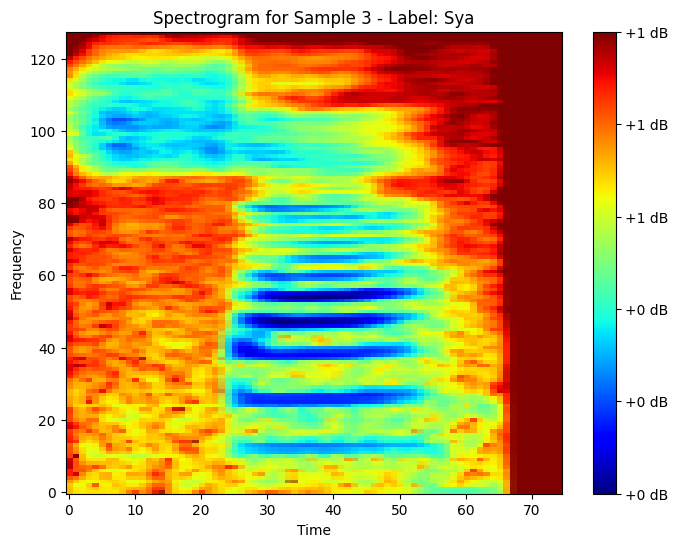

In [10]:
#Check Spectogram

import matplotlib.pyplot as plt

# Pilih salah satu sampel dari X_train
sample_index_to_visualize = 3

# Dapatkan label dari sampel yang dipilih
sample_label = labels[sample_index_to_visualize]

# Plot spektrogram dengan label sebagai judul
plt.figure(figsize=(8, 6))
plt.imshow(data[sample_index_to_visualize], aspect='auto', cmap='jet',origin='lower')
plt.title(f"Spectrogram for Sample {sample_index_to_visualize} - Label: {sample_label}")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()


In [ ]:
#Check MFCC

import matplotlib.pyplot as plt

# Pilih salah satu sampel dari X_train
sample_index_to_visualize = 1

# Dapatkan label dari sampel yang dipilih
sample_label = labels[sample_index_to_visualize]
#MFCC Scaled
mfccScaled = np.mean(X_train[sample_index_to_visualize].T, axis=0)
print(mfccScaled.shape)

plt.plot(mfccScaled)
plt.title(f"MFCC for Sample {sample_index_to_visualize} - Label: {sample_label}")
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

# Model Manual

In [ ]:
#Model Conv

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(X_train.shape[1], X_train.shape[2],3)))
#model.add(layers.InputLayer(input_shape=(X_train.shape[1])))
#model.add(layers.Reshape((X_train.shape[1], X_train.shape[2], 1)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.LSTM(32))
#model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

In [ ]:
#Model LSTM
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
model = models.Sequential()
#model.add(layers.InputLayer(input_shape=(X_train.shape[1], X_train.shape[2],3)))
# model.add(layers.Conv1D(filters=64, kernel_size=3,
#                                strides=1,
#                                activation="relu",
#                                padding='causal',
#                                input_shape=[20, 1]))
model.add(layers.LSTM(64, input_shape=(None, X_train.shape[1],1), return_sequences=True))
model.add(layers.LSTM(64, return_sequences=True))
layers.LSTM(64),
#model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

In [ ]:
#Model LSTM
# X_train = np.expand_dims(X_train, axis=-1)
# X_test = np.expand_dims(X_test, axis=-1)
y_trainn = np.expand_dims(y_train, axis=1)
y_testt = np.expand_dims(y_test, axis=1)
model = models.Sequential()
#model.add(layers.InputLayer(input_shape=(X_train.shape[1], X_train.shape[2],3)))
# model.add(layers.Conv1D(filters=64, kernel_size=3,
#                                strides=1,
#                                activation="relu",
#                                padding='causal',
#                                input_shape=[20, 1]))
# model.add(layers.InputLayer(input_shape=(X_train.shape[1])))
# model.add(layers.Reshape((X_train.shape[1], 1)))
model.add(layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(layers.LSTM(64, return_sequences=True))
layers.LSTM(64),
#model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# InceptionV3 Model

In [11]:
#Pre-trained Model InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
import urllib.request
from tensorflow.keras.applications.inception_v3 import InceptionV3
inceptionv3 = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
urllib.request.urlretrieve(inceptionv3, 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model =  InceptionV3(input_shape = (128, 75, 3), 
                                include_top = False,
                                weights = None)

for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed5')
last_output = last_layer.output
pre_trained_model.load_weights(local_weights_file)

In [43]:
x = layers.Flatten()(last_output)
#x = layers.Dropout(0.3)(last_output)
#x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
#x = layers.Dense(16, activation='relu')(x)
#x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dense(1536, activation='relu')(x)
#x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(len(label_encoder.classes_), activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
history2 = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
207/207 [==============================] - 9s 23ms/step - loss: 3.1679 - accuracy: 0.2458 - val_loss: 2.1456 - val_accuracy: 0.3742
Epoch 2/200
207/207 [==============================] - 3s 16ms/step - loss: 1.4990 - accuracy: 0.5652 - val_loss: 1.4988 - val_accuracy: 0.5284
Epoch 3/200
207/207 [==============================] - 3s 15ms/step - loss: 0.9151 - accuracy: 0.7268 - val_loss: 1.3532 - val_accuracy: 0.5859
Epoch 4/200
207/207 [==============================] - 3s 17ms/step - loss: 0.5892 - accuracy: 0.8275 - val_loss: 1.0238 - val_accuracy: 0.6699
Epoch 5/200
207/207 [==============================] - 3s 15ms/step - loss: 0.4114 - accuracy: 0.8827 - val_loss: 0.9899 - val_accuracy: 0.6681
Epoch 6/200
207/207 [==============================] - 3s 16ms/step - loss: 0.2917 - accuracy: 0.9223 - val_loss: 0.8945 - val_accuracy: 0.7116
Epoch 7/200
207/207 [==============================] - 3s 16ms/step - loss: 0.2145 - accuracy: 0.9453 - val_loss: 0.9303 - val_accuracy:

In [40]:
#Save Model
model.save('model_full_inception_78.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
#Plot
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()



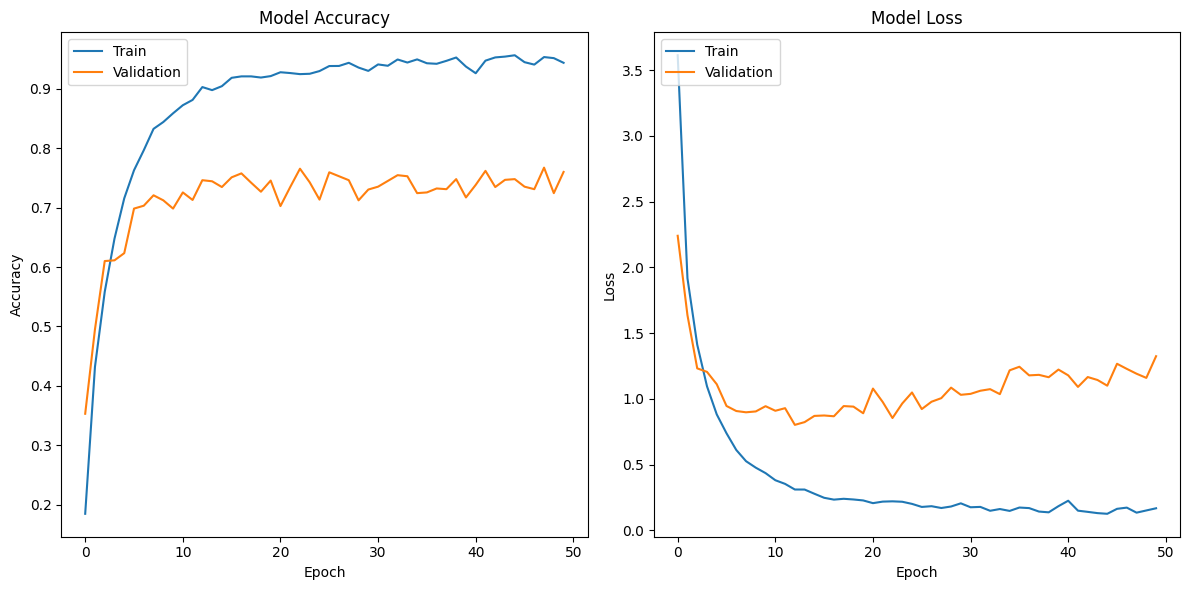

In [17]:
# Call the function to plot the history
plot_history(history2)

# Prediction

In [18]:
y_pred_ = model.predict(X_test, use_multiprocessing=True, workers=6, verbose=1)

52/52 [==============================] - 1s 9ms/step


# Evaluate

In [30]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    """
    plots the confusion matrix
    """
    matrix = confusion_matrix(y_true, y_pred)    
    fig, ax = plt.subplots(figsize=(20,60))
    #fig, ax = plt.subplots(figsize=(12,10))
    plt.imshow(matrix)
    ax.set_xticks(range(len(labels)));
    ax.set_xticklabels(labels, rotation=0)
    ax.set_yticks(range(len(labels)));
    ax.set_yticklabels(labels)
    max_confusions = 0
    confused_classes = (-1, -1)
    for i, true_label in enumerate(matrix):
        for j, predicted_label in enumerate(true_label):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="w");
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.title("Confusion Matrix");

prediksi :  [3.69044579e-16 9.32317049e-13 2.37803759e-15 4.34680114e-15
 6.85413761e-05 1.68228128e-19 1.30151101e-09 1.50228498e-05
 8.04673550e-10 5.30446277e-11 1.32488473e-16 1.25604050e-11
 4.10327669e-13 3.29261981e-13 3.58727292e-09 9.67378676e-01
 1.06196198e-10 2.51315151e-18 1.22589294e-09 7.45278752e-12
 8.42949232e-15 3.16474000e-11 1.88790140e-18 2.72682804e-23
 4.65974759e-11 5.20797051e-11 9.46187087e-19 3.09260945e-14
 1.23766570e-13 2.98301618e-12 8.56987073e-18 2.21001994e-10
 8.44351145e-18 6.77276361e-17 1.51712862e-24 1.17532987e-14
 3.88878120e-17 8.10363755e-12 4.65490556e-15 1.57269545e-11
 4.15073002e-19 5.63298365e-19 1.14039413e-23 1.02113048e-18
 3.39740228e-22 6.64600985e-10 1.18308280e-10 9.78493453e-18
 2.36366763e-14 7.35199102e-09 7.96597482e-16 6.03300829e-13
 2.51452093e-12 1.58411558e-06 1.89181339e-13 2.15885188e-06
 1.62708020e-12 1.61586324e-23 4.04788135e-14 2.31506871e-22
 2.50345721e-19 6.41305273e-11 8.66136425e-19 2.42837305e-16
 1.06522551e

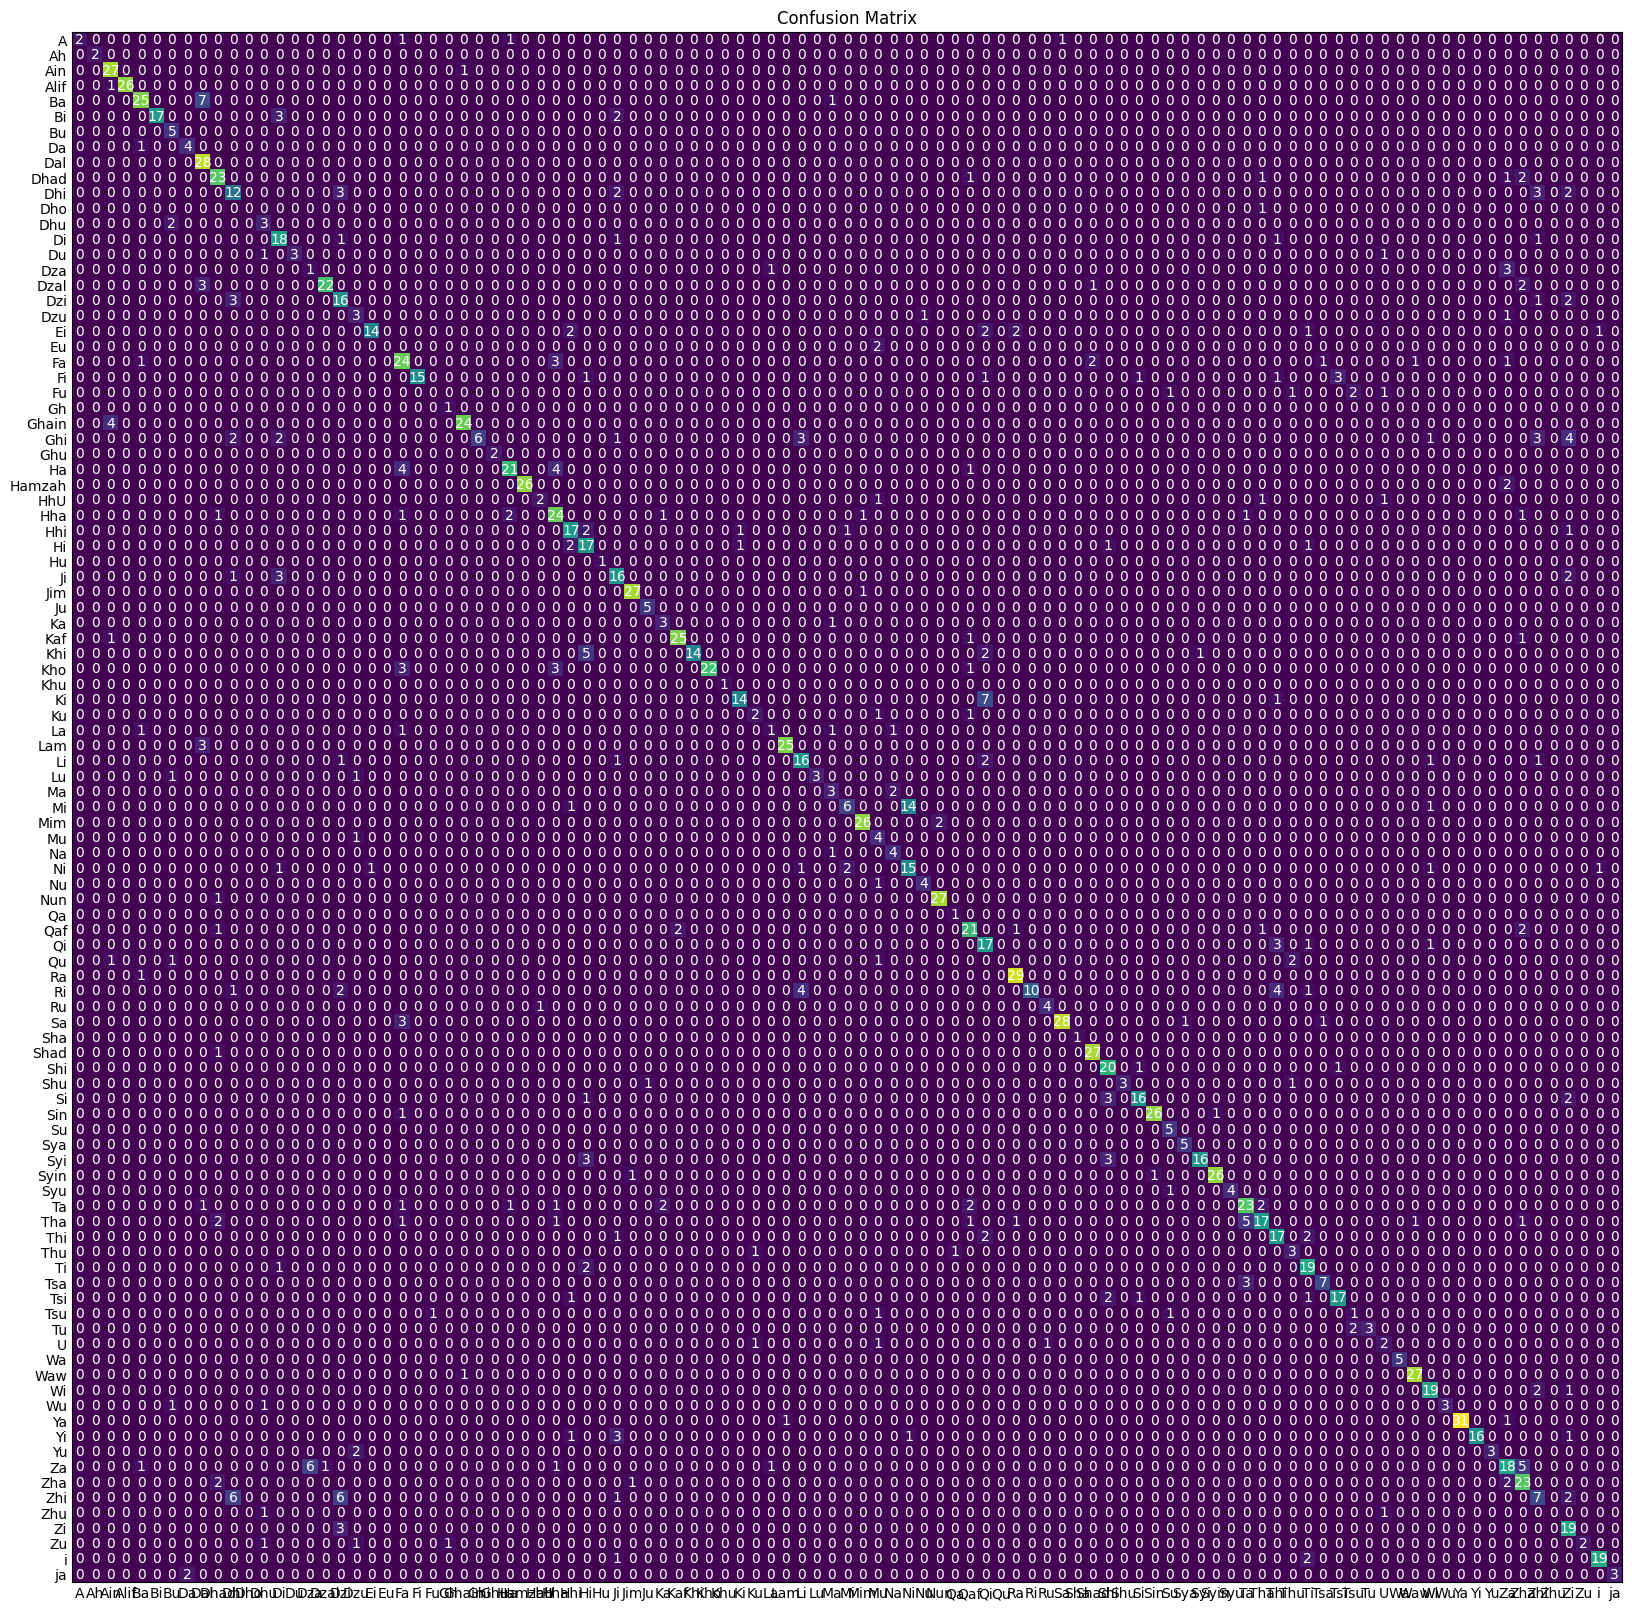

In [31]:
y_pred = np.argmax(y_pred_, axis=1)
y_true = np.argmax(y_test, axis=1)
index = 300
print("prediksi : ", y_pred_[y_pred[index]])
print("yang benar : ", y_test[y_true[index]])

test = np.expand_dims(X_test[index], axis=0)
print("test shape : ", test.shape)
# benar = y_test[index]
prediksi = model.predict(test)
index_prediksi = np.argmax(prediksi, axis=1)
print("prediksi : ", y_pred[index])
print("prediksi shape: ", prediksi.shape)
print("test : ", prediksi)
print("test index : ", index_prediksi)
print("test : ", prediksi[0, index_prediksi])
print("yang benar : ", y_true[index])
labels = label_encoder.classes_
plot_confusion_matrix(y_true, y_pred, labels)

In [30]:
#Testing Predict
audio_file = "/kaggle/input/dataset-hijaiyah/Dataset Hijaiyah/Hijaiyah polos/25_Nun/2_4_NT_Noon_T10001.wav"
true_label = '25_nun'
data = process_audio_to_spectrogram(audio_file, target_length=12000)
data = np.expand_dims(data, axis=0)
predicted = model.predict(data)
top_predict = np.argmax(predicted, axis=1)


print("Predict result : ", predicted)
print("Label index : ", top_predict)
print("Label name : ", label_encoder.classes_[top_predict])

1/1 [==============================] - 0s 51ms/step
Predict result :  [[2.6527500e-09 1.8013134e-12 6.5256778e-10 1.3944617e-11 2.3759122e-15
  1.1514542e-06 8.5240730e-09 1.5967119e-09 3.6847848e-07 7.1299451e-07
  5.5577043e-08 8.0551532e-14 1.8430099e-09 8.5623647e-13 5.8353800e-07
  9.3332565e-05 9.9983811e-01 4.4479260e-05 2.9057171e-13 1.3719097e-05
  7.2057701e-06 1.3950576e-11 2.0036668e-15 1.1864861e-11 3.4788332e-07
  2.4487580e-18 1.9933662e-16 1.1143029e-11 1.5962605e-10]]
Label index :  [16]
Label name :  ['25_Nun']


# Load Model

In [35]:
from keras.models import load_model

model_path = '/kaggle/working/model_polos_inception_89.h5'
loaded_model = load_model(model_path)

# Load label from CSV

In [40]:
#Load label from csv
csv_file_path = '/kaggle/working/polos_labels.csv'
loaded_labels = load_labels_from_csv(csv_file_path)
print(loaded_labels)

['10_Ra', '11_Za', '12_Sin', '13_Syin', '14_Shad', '15_Dhad', '16_Tha', '17_Zha', '18_Ain', '19_Ghain', '1_Alif', '20_Fa', '21_Qaf', '22_Kaf', '23_Lam', '24_Mim', '25_Nun', '26_Waw', '27_Hha', '28_Hamzah', '29_Ya', '2_Ba', '3_Ta', '4_Tsa', '5_Jim', '6_Ha', '7_Kho', '8_Dal', '9_Dzal']


# Predict

In [51]:
def predict_audio(audio_file, true_label, label_list):
    spectrogram = process_audio_to_spectrogram(audio_file, target_length=12000)
    spectrogram = np.expand_dims(spectrogram, axis=0)
    predicted = model.predict(spectrogram)
    top_predict_index = np.argmax(predicted, axis=1)
    label_name = label_list[int(top_predict)]
    probability = predicted[0,top_predict_index]
    
    return predicted, top_predict_index, label_name, probability

In [53]:
#Testing Predict
audio_file = "/kaggle/input/dataset-hijaiyah/Dataset Hijaiyah/Hijaiyah polos/25_Nun/2_4_NT_Noon_T10001.wav"
true_label = '25_nun'
predicted, top_predict_index, label_name, probability = predict_audio(audio_file, true_label, loaded_labels)

print("Predict result : ", predicted)
print("\nLabel index\t\t: ", top_predict_index)
print("Predicted label name\t: ", label_name)
print("True Label name\t\t: ", true_label)
print("Probability\t\t: ",probability)

1/1 [==============================] - 0s 53ms/step
Predict result :  [[2.6527500e-09 1.8013134e-12 6.5256778e-10 1.3944617e-11 2.3759122e-15
  1.1514542e-06 8.5240730e-09 1.5967119e-09 3.6847848e-07 7.1299451e-07
  5.5577043e-08 8.0551532e-14 1.8430099e-09 8.5623647e-13 5.8353800e-07
  9.3332565e-05 9.9983811e-01 4.4479260e-05 2.9057171e-13 1.3719097e-05
  7.2057701e-06 1.3950576e-11 2.0036668e-15 1.1864861e-11 3.4788332e-07
  2.4487580e-18 1.9933662e-16 1.1143029e-11 1.5962605e-10]]

Label index		:  [16]
Predicted label name	:  25_Nun
True Label name		:  25_nun
Probability		:  [0.9998381]
